# if you think you understand quantum mechanics, then you don't.  Richard Feynman

Discrete Fourier Transformation(DFT): Unitary operation on Hilbert space, which mapped N-dimensional vector to other N-dimensional vectos.

Quantum Fourier Transformation(QFT): Every ket in Hilbert space has $2^n$ coordinates. Now apply $2^nth$ order DFT to those coordinates and we will get new vectors with  $2^n$ coordinates, these coordinates defines out put ket of QFT.

# 1.single qubit state

$|0> = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$

$|1> = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$

## 2. Representing Two-Qubit States <a id="represent"></a>

We saw that a single bit has two possible states, and a qubit state has two complex amplitudes. Similarly, two bits have four possible states:

`00` `01` `10` `11`

$$ |00\rangle  = \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix},\quad |01\rangle  = \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix}, \quad |10\rangle  = \begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix}, \quad|11\rangle  = \begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix} $$





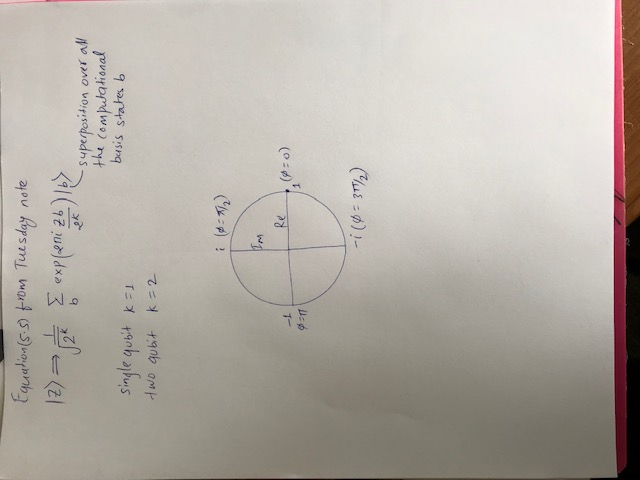

QFT matrix of single qubit

QFT1 = $\frac{1}{\sqrt(2)}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}$

Circuit decomposition

# QFT matrix for two qubit system

QFT2 = $\frac{1}{(2)}\begin{pmatrix} 1 & 1 & 1 & 1\\ 1 & i & -1 & -i \\ 1 & -1 & 1 & -1 \\ 1 & -i & -1 & i \end{pmatrix}$

Circuit Decomposition  

In [1]:
#supporting package
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi, sqrt
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, Aer

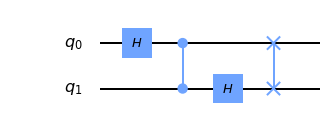

In [2]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cz(0, 1) #squareroot control Z-gate
qc.h(1)
qc.swap(0,1) # to make completeness in orthonormal basis
qc.draw('mpl')

In [14]:
s = np.array([[1,0,0,0],[0,0,1,0],[0,1,0,0],[0,0,0,1]])
s


array([[1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]])

In [15]:
h = np.array([[0.707,0.707,0,0],[0.707,-0.707,0,0],[0,0,0.707,0.707],[0,0,0.707,-0.707]])
h

array([[ 0.707,  0.707,  0.   ,  0.   ],
       [ 0.707, -0.707,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.707,  0.707],
       [ 0.   ,  0.   ,  0.707, -0.707]])

In [16]:
z=np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,0+1.j]])
z

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+1.j]])

In [17]:
QFT2 = s*h*z*h #need to do

In [19]:
#QFT2

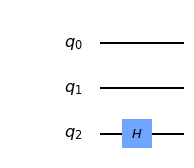

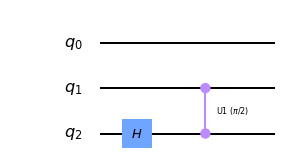

In [10]:
qc = QuantumCircuit(3)
qc.h(2)
display( qc.draw('mpl') )

# UROT_2 gate to x1 depending on x2
qc.cu1(pi/2, 1, 2) # CROT from qubit 1 to qubit 2 hence the angle: pi/2^{2-1}
display ( qc.draw('mpl') )

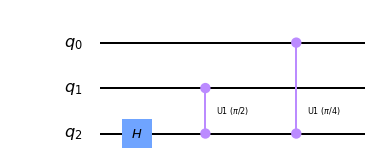

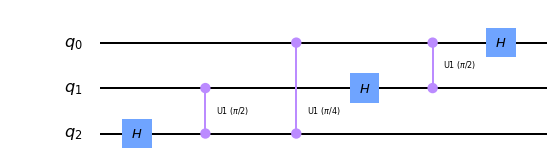

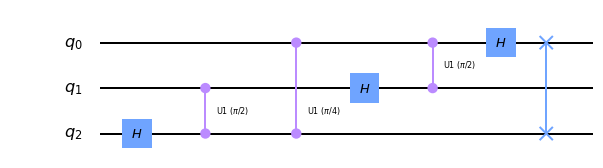

In [11]:
qc.cu1(pi/4, 0, 2) # CROT from qubit 2 to qubit 0 hence the angle: pi/2^{2-0}
display( qc.draw('mpl') )

# Repeat the process for 1 and 0 
qc.h(1)  # Hadamard on 1
qc.cu1(pi/2, 0, 1) # CROT from qubit 0 to qubit 1 hence the angle: pi/2^{1-0}
qc.h(0)  # Hadamard on 0
display( qc.draw('mpl') )

# Now swap the qubit 0 and 2 to complete QFT. [NOT CLEAR TO ME]
qc.swap(0,2)
display ( qc.draw('mpl') )

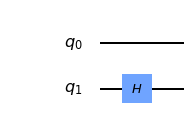

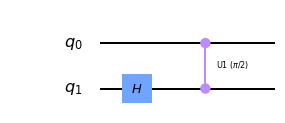

In [12]:
qc = QuantumCircuit(2)
qc.h(1)
display( qc.draw('mpl') )

# UROT_1 gate to x0 depending on x1
qc.cu1(pi/2, 0, 1) # CROT from qubit 0 to qubit 1 hence the angle: pi/2^{1-0}
display ( qc.draw('mpl') )

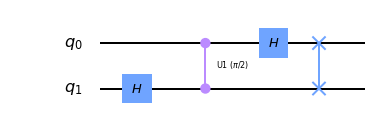

In [13]:
qc.h(0)  # Hadamard on 1
# Now swap the qubit 0 and 2 to complete QFT. [To make orthonormal bais set completeness]
qc.swap(0,1)
display ( qc.draw('mpl') )